In [1]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import time,sys,os
from sklearn.cluster import KMeans

prod = '6mo'
dys = 180
dates = '2020-12-14' # 直近のDL日

today = datetime.date.today()
last = today +datetime.timedelta(days=-dys)
last = pd.to_datetime(last)

os.makedirs('./csv/'+str(today),exist_ok = True)

In [2]:
TP = pd.read_csv('./csv/TOPIX_small1/TOPIX_small1.csv')
data =pd.DataFrame(TP)
stocks = [str(s)+".T" for s in data.code]
stocks.append("^N225")
tickers = yf.Tickers(" ".join(stocks))

In [3]:
'''終値　毎日変わる'''
closes   = [] # 終値

for i in range(len(tickers.tickers)):
    start = time.time()
    closes.append(tickers.tickers[i].history(period=prod).Close)
    t = time.time() - start
    print(tickers.tickers[i],t)

closes = pd.DataFrame(closes).T   # DataFrame化
closes.columns = stocks           # カラム名の設定
closes = closes.ffill()           # 欠損データの補完
closes.to_csv('./csv/'+str(today)+'/closes_'+ str(today)+'_'+prod+'_small498.csv')

yfinance.Ticker object <1377.T> 0.9345133304595947
yfinance.Ticker object <1379.T> 0.7028980255126953
yfinance.Ticker object <1414.T> 0.6260251998901367
yfinance.Ticker object <1417.T> 0.6271705627441406
yfinance.Ticker object <1419.T> 0.7263314723968506
yfinance.Ticker object <1662.T> 0.7352724075317383
yfinance.Ticker object <1719.T> 0.6263704299926758
yfinance.Ticker object <1720.T> 0.7388131618499756
yfinance.Ticker object <1766.T> 0.7259795665740967
yfinance.Ticker object <1805.T> 0.9054465293884277
yfinance.Ticker object <1815.T> 0.8275957107543945
yfinance.Ticker object <1822.T> 0.736591100692749
yfinance.Ticker object <1835.T> 0.7491488456726074
yfinance.Ticker object <1852.T> 0.7347207069396973
yfinance.Ticker object <1861.T> 0.5968363285064697
yfinance.Ticker object <1881.T> 0.7321085929870605
yfinance.Ticker object <1885.T> 0.6445965766906738
yfinance.Ticker object <1890.T> 0.6203124523162842
yfinance.Ticker object <1926.T> 0.6160671710968018
yfinance.Ticker object <1941.T> 

KeyboardInterrupt: 

In [58]:
#closes= pd.read_csv('./csv/'+str(today)+'/closes_'+ str(today)+'_'+prod+'_small498.csv')
closes= pd.read_csv('./csv/2020-12-14/closes_2020-12-14_6mo_small498.csv')

closes['Date'] = pd.to_datetime(closes['Date'])
closes.set_index('Date',inplace=True)

earnings = pd.read_csv('./csv/'+str(dates)+'/earnings_'+str(dates)+'_'+prod+'_small498N.csv')
earnings.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
earnings['Date'] = pd.to_datetime(earnings['Date'])
earnings.set_index('Date',inplace=True)

shares= pd.read_csv('./csv/'+str(dates)+'/shares'+str(dates)+'_'+prod+'_small498N.csv')
shares.rename(columns={'Unnamed: 0':'stocks'},inplace=True)
shares.set_index('stocks',inplace=True)
shares = shares['0']

equity=pd.read_csv('./csv/'+str(dates)+'/equity'+str(dates)+'_'+prod+'_small498N.csv')
equity.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
equity['Date'] = pd.to_datetime(equity['Date'])
equity.set_index('Date',inplace=True)

eps=pd.read_csv('./csv/'+str(dates)+'/eps'+str(dates)+'_'+prod+'_small498N.csv')
eps.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
eps['Date'] = pd.to_datetime(eps['Date'])
eps.set_index('Date',inplace=True)

roe=pd.read_csv('./csv/'+str(dates)+'/roe'+str(dates)+'_'+prod+'_small498N.csv')
roe.rename(columns ={'Unnamed: 0':'Date'},inplace=True) 
roe['Date'] = pd.to_datetime(roe['Date'])
roe.set_index('Date',inplace=True)


In [59]:
closes

,1377.T,1379.T,1414.T,1417.T,1419.T,1662.T,1719.T,1720.T,1766.T,1805.T,...,9869.T,9928.T,9934.T,9936.T,9945.T,9946.T,9948.T,9956.T,9997.T,^N225
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-15,3400.488770,1974.363159,4771.494141,1460.278198,1191.0,1840.268433,615.892029,561.0,7170.0,1043.0,...,3584.214111,2339.0,2290.372070,6000.0,1784.0,1520.097168,2120.118896,2128.009766,604.003113,21530.949219
2020-06-16,3390.531250,2009.210693,4840.861328,1561.055176,1255.0,1905.288574,633.544983,590.0,7400.0,1101.0,...,3643.703125,2358.0,2415.104980,6140.0,1826.0,1544.935303,2162.719482,2176.621826,644.666687,22582.210938
2020-06-17,3445.297607,2031.114868,4885.455078,1580.815308,1259.0,1897.407349,638.448608,576.0,7370.0,1095.0,...,3609.001221,2399.0,2379.747559,6080.0,1796.0,1525.064819,2132.998047,2168.685059,660.535400,22455.759766
2020-06-18,3395.510010,2010.206421,4885.455078,1582.791382,1243.0,1881.644897,646.294373,576.0,7460.0,1092.0,...,3599.086426,2359.0,2368.944092,6110.0,1807.0,1513.142456,2134.979492,2147.851562,634.748718,22355.460938
2020-06-19,3430.361328,2006.223755,4925.093262,1561.055176,1275.0,1857.015991,641.390747,582.0,7450.0,1095.0,...,3534.639893,2359.0,2370.908203,6120.0,1795.0,1491.284790,2135.970215,2160.748535,622.847168,22478.789062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-08,3350.000000,2058.000000,5010.000000,1628.000000,1432.0,1772.000000,718.000000,495.0,7760.0,1098.0,...,3435.000000,1963.0,2401.000000,5930.0,1703.0,1369.000000,2190.000000,2532.000000,896.000000,26467.080078
2020-12-09,3375.000000,2073.000000,5060.000000,1651.000000,1430.0,1773.000000,725.000000,501.0,7790.0,1104.0,...,3415.000000,1996.0,2465.000000,5940.0,1707.0,1385.000000,2240.000000,2609.000000,907.000000,26817.939453
2020-12-10,3470.000000,2101.000000,5090.000000,1665.000000,1413.0,1775.000000,718.000000,504.0,7750.0,1101.0,...,3430.000000,1994.0,2451.000000,6000.0,1729.0,1378.000000,2225.000000,2640.000000,903.000000,26756.240234


In [60]:
latest_closes = closes.iloc[-1]
latest_eps = eps.iloc[-1]
PE = latest_closes / latest_eps
PE= pd.DataFrame(PE)
PE['stocks'] =PE.index
PE.columns = ['PE','stocks'] 

In [61]:
closes["week"] = closes.index.week                              # 月カラムの作成
closes["end_of_week"] = closes.week.diff().shift(-1)            # 月末フラグカラムの作成
closes = closes[closes.end_of_week != 0]                         # 月末のみ抽出

/home/lcj001/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


In [62]:
closes

,1377.T,1379.T,1414.T,1417.T,1419.T,1662.T,1719.T,1720.T,1766.T,1805.T,...,9934.T,9936.T,9945.T,9946.T,9948.T,9956.T,9997.T,^N225,week,end_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-19,3430.361328,2006.223755,4925.093262,1561.055176,1275.0,1857.015991,641.390747,582.0,7450.0,1095.0,...,2370.908203,6120.0,1795.0,1491.284790,2135.970215,2160.748535,622.847168,22478.789062,25,1.0
2020-06-26,3425.382568,2012.197632,4880.500000,1599.587524,1285.0,1790.025513,609.026978,566.0,7070.0,1047.0,...,2417.069336,6140.0,1815.0,1490.291260,2134.979492,2093.287109,622.847168,22512.080078,26,1.0
2020-07-03,3241.168701,1971.376221,4850.000000,1549.198975,1187.0,1802.832520,602.161987,535.0,6900.0,1027.0,...,2369.926025,5840.0,1748.0,1412.796143,2227.115479,2076.421875,642.683105,22306.480469,27,1.0
2020-07-10,3261.083740,1972.371948,4715.000000,1499.798584,1170.0,1755.545166,577.643982,532.0,6960.0,1019.0,...,2387.604736,5620.0,1731.0,1482.343018,2452.997314,2135.946533,629.789734,22290.810547,28,1.0
2020-07-17,3206.317383,2066.958008,4710.000000,1569.947266,1173.0,1827.461426,604.123413,546.0,7100.0,1077.0,...,2461.266113,5730.0,1729.0,1535.000000,2541.170654,2254.003906,714.092346,22696.419922,29,1.0
2020-07-22,3261.083740,2058.992920,4735.000000,1582.791382,1177.0,1841.253540,597.258362,541.0,7110.0,1093.0,...,2423.944336,5750.0,1726.0,1533.012939,2516.402832,2242.098877,733.928223,22751.609375,30,1.0
2020-07-31,3211.296143,2079.901611,4530.000000,1434.589844,1086.0,1674.762451,551.164551,490.0,6720.0,1001.0,...,2381.711914,5020.0,1617.0,1438.627808,2425.257568,2272.853516,742.854370,21710.000000,31,1.0
2020-08-07,3300.913574,2080.897217,4520.000000,1427.673828,1190.0,1770.322388,607.065552,472.0,6550.0,1049.0,...,2506.444824,5630.0,1697.0,1474.394897,2414.359619,2319.481201,892.615417,22329.939453,32,1.0
2020-08-14,3505.042480,2152.583496,5060.000000,1518.570679,1264.0,1806.773193,643.352173,495.0,6790.0,1103.0,...,2584.034668,5860.0,1752.0,1507.181274,2575.845459,2532.778076,913.443115,23289.359375,33,1.0


In [63]:
weekly_rt = closes.pct_change().shift(-1)                        # 月次リターンの作成(ラグあり)
weekly_rt = weekly_rt.sub(weekly_rt["^N225"], axis=0)          # マーケットリターン控除

closes = closes[closes.index > str(last)]     # 6m
weekly_rt = weekly_rt[weekly_rt.index > str(last)]

closes = closes.drop(["^N225", "week", "end_of_week"], axis=1)  # 不要なカラムを削除
weekly_rt = weekly_rt.drop(["^N225", "week", "end_of_week"], axis=1)

eps_df = pd.DataFrame(index=weekly_rt.index, columns=weekly_rt.columns) # 月次リターンと同次元のDF作成
roe_df = pd.DataFrame(index=weekly_rt.index, columns=weekly_rt.columns)

for i in range(len(eps_df)):                                              # 各行への代入
    eps_df.iloc[i] = eps[eps.index < eps_df.index[i]].iloc[-1]

for i in range(len(roe_df)):
    roe_df.iloc[i] = roe[roe.index < roe_df.index[i]].iloc[-1]

per_df = closes/eps_df                                                    # PERデータフレームの作成

stack_weekly_rt = weekly_rt.stack()                                  # 1次元にスタック
stack_per_df = per_df.stack()
stack_roe_df = roe_df.stack()

df = pd.concat([stack_weekly_rt, stack_per_df, stack_roe_df], axis=1) # 結合
df.columns = ["rt", "per", "roe"]# カラム名の設定

In [64]:
df["rt"][df.rt > 1.0] = np.nan         
df.to_csv('./csv/'+str(today)+'/df'+str(today)+'_'+prod+'_small498N.csv')

/home/lcj001/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
#df = pd.read_csv('./csv/'+str(dates)+'/df'+str(dates)+'_'+prod+'_small498N.csv')
df = pd.read_csv('./csv/'+str(today)+'/df'+str(today)+'_'+prod+'_small498N.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Unnamed: 1':'stocks'})
df = df.groupby(['Date','stocks']).mean()

In [66]:
value_df = df[(df.per < 10) & (df.roe > 0.1)]
#value_df = df
df1 =pd.pivot_table(value_df, index='stocks',columns='Date',values='rt')
df1=df1.fillna(0)
kmean_model = KMeans(n_clusters=10,random_state=0).fit(df1)
labels = kmean_model.labels_
df1['label'] = labels
kmean_list = df1.iloc[:,-1]

In [67]:
#kmean_list.to_csv('./csv/'+str(dates)+'/kmean_list'+str(dates)+'_'+prod+'_small498N.csv')
kmean_list.to_csv('./csv/'+str(today)+'/kmean_list'+str(today)+'_'+prod+'_small498N.csv')

In [68]:
df2 = df1.groupby(['label','stocks']).mean()
df2 = df2.stack()
df2 = pd.DataFrame(df2)

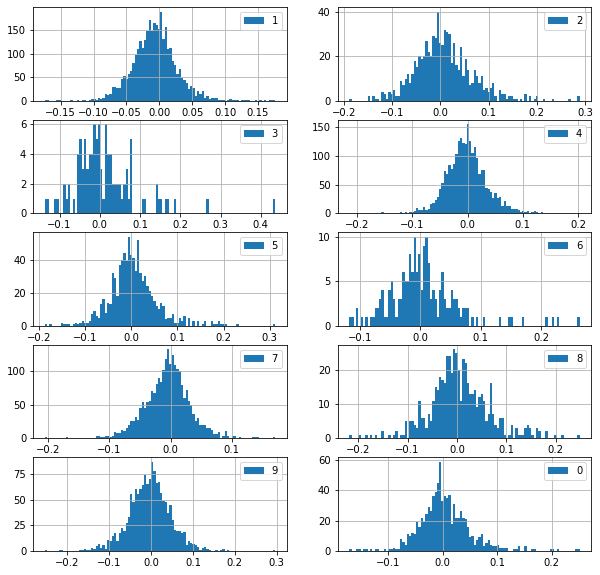

In [69]:
plt.figure(figsize=(10,10))

ax1 = plt.subplot(5,2,1)
ax2 = plt.subplot(5,2,2)
ax3 = plt.subplot(5,2,3)
ax4 = plt.subplot(5,2,4)
ax5 = plt.subplot(5,2,5)
ax6 = plt.subplot(5,2,6)
ax7 = plt.subplot(5,2,7)
ax8 = plt.subplot(5,2,8)
ax9 = plt.subplot(5,2,9)
ax0 = plt.subplot(5,2,10)
ax0.hist(df2.query('label == 0'),bins=100)
ax0.legend('0')

ax1.hist(df2.query('label == 1'),bins=100)
ax1.legend('1')

ax2.hist(df2.query('label == 2'),bins=100)
ax2.legend('2')
ax3.hist(df2.query('label == 3'),bins=100)
ax3.legend('3')
ax4.hist(df2.query('label == 4'),bins=100)
ax4.legend('4')
ax5.hist(df2.query('label == 5'),bins=100)
ax5.legend('5')
ax6.hist(df2.query('label == 6'),bins=100)
ax6.legend('6')
ax7.hist(df2.query('label == 7'),bins=100)
ax7.legend('7')
ax8.hist(df2.query('label == 8'),bins=100)
ax8.legend('8')
ax9.hist(df2.query('label == 9'),bins=100)
ax9.legend('9')

ax0.grid()
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()
ax7.grid()
ax8.grid()
ax9.grid()

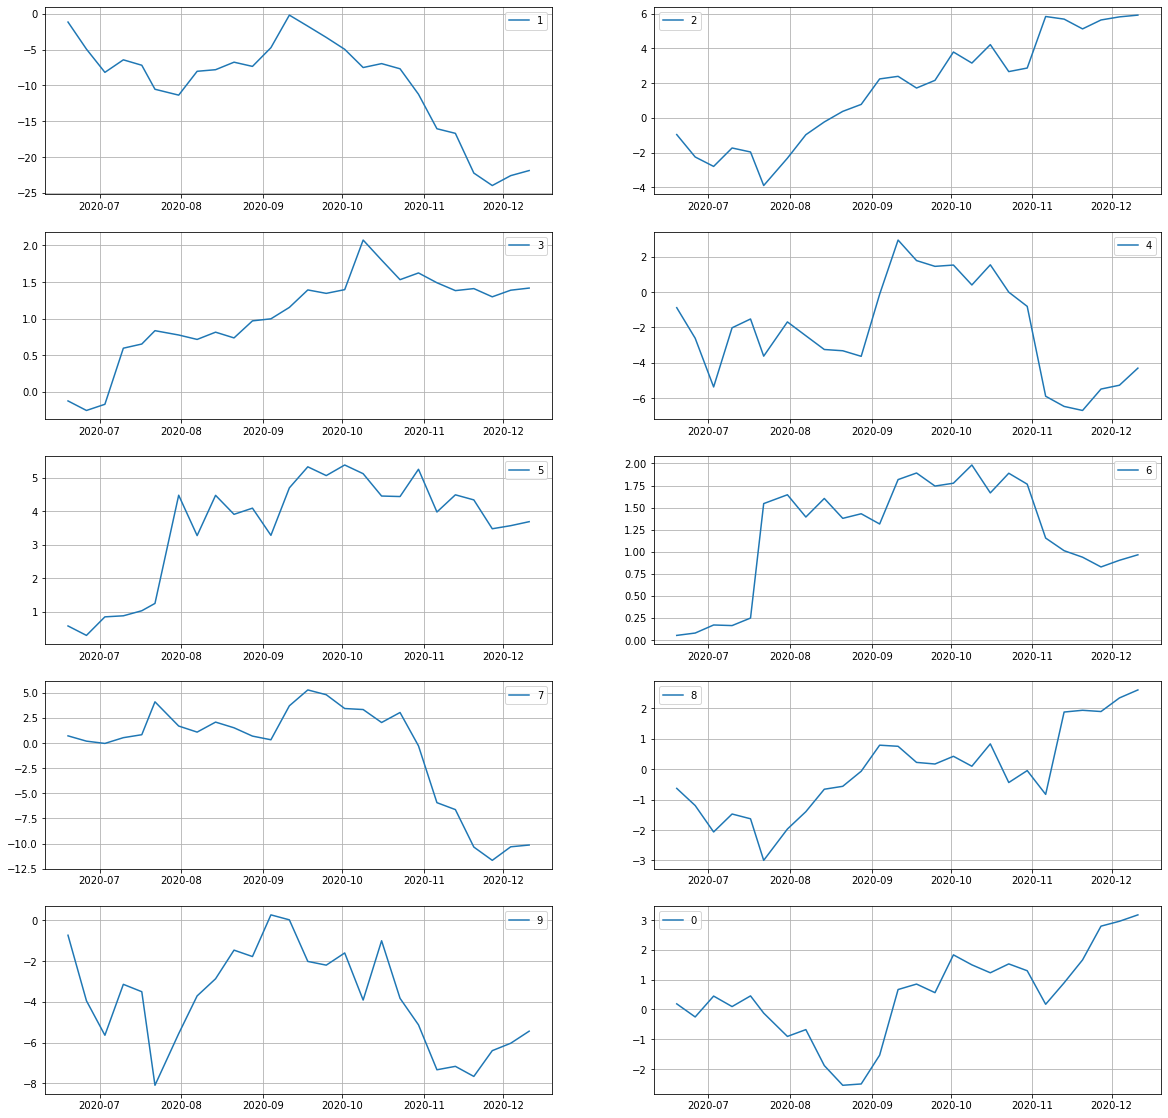

In [84]:
plt.figure(figsize=(20,20))

ax1 = plt.subplot(5,2,1)
ax2 = plt.subplot(5,2,2)
ax3 = plt.subplot(5,2,3)
ax4 = plt.subplot(5,2,4)
ax5 = plt.subplot(5,2,5)
ax6 = plt.subplot(5,2,6)
ax7 = plt.subplot(5,2,7)
ax8 = plt.subplot(5,2,8)
ax9 = plt.subplot(5,2,9)
ax0 = plt.subplot(5,2,10)

df0 = df2.query('label == 0')
df00 =df0.groupby('Date').sum().cumsum()
ax0.plot(df00)

df1 = df2.query('label == 1')
df11 =df1.groupby('Date').sum().cumsum()
ax1.plot(df11)

df22 = df2.query('label == 2')
df222 =df22.groupby('Date').sum().cumsum()
ax2.plot(df222)

df3 = df2.query('label == 3')
df33 =df3.groupby('Date').sum().cumsum()
ax3.plot(df33)

df4 = df2.query('label == 4')
df44 =df4.groupby('Date').sum().cumsum()
ax4.plot(df44)

df5 = df2.query('label == 5')
df55 =df5.groupby('Date').sum().cumsum()
ax5.plot(df55)

df6 = df2.query('label == 6')
df66 =df6.groupby('Date').sum().cumsum()
ax6.plot(df66)

df7 = df2.query('label == 7')
df77 =df7.groupby('Date').sum().cumsum()
ax7.plot(df77)

df8 = df2.query('label == 8')
df88 =df8.groupby('Date').sum().cumsum()
ax8.plot(df88)

df9 = df2.query('label == 9')
df99 =df9.groupby('Date').sum().cumsum()
ax9.plot(df99)

ax0.legend('0')
ax1.legend('1')
ax2.legend('2')
ax3.legend('3')
ax4.legend('4')
ax5.legend('5')
ax6.legend('6')
ax7.legend('7')
ax8.legend('8')
ax9.legend('9')

ax0.grid()
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()
ax7.grid()
ax8.grid()
ax9.grid()

In [71]:
TP= pd.read_csv('./csv/TOPIX_small1/TOPIX_small1_info.csv')
TP.rename(columns={'コード':'code'},inplace=True)

In [72]:
TP['stocks'] = [str(s)+".T" for s in TP.code]

In [73]:
tp_kmean = pd.merge(TP,kmean_list,on='stocks')
tp_kmean = pd.merge(PE,tp_kmean,on='stocks') # P/E 40以下 株価収益率の標準値は14から20の間 

In [74]:
tp_kmean.query('label == 0')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
56,39.054934,2678.T,20200930,アスクル,2678,小売業,0.02%,TOPIX Small 1,0
83,27.859001,3098.T,20200930,ココカラファイン,3098,小売業,0.03%,TOPIX Small 1,0
92,23.545481,3186.T,20200930,ネクステージ,3186,小売業,0%,TOPIX Small 1,0
102,18.787888,3433.T,20200930,トーカロ,3433,金属製品,0.01%,TOPIX Small 1,0
112,38.813967,3655.T,20200930,ブレインパッド,3655,情報・通信業,0.00%,TOPIX Small 1,0
117,20.414831,3673.T,20200930,ブロドリーフ,3673,情報・通信業,0.01%,TOPIX Small 1,0
120,1367.074299,3694.T,20200930,オプティム,3694,情報・通信業,0.01%,TOPIX Small 1,0
124,49.082602,3844.T,20200930,コムチュア,3844,情報・通信業,0.01%,TOPIX Small 1,0
148,36.788123,4369.T,20200930,トリケミカル,4369,化学,0.01%,TOPIX Small 1,0
151,79.225729,4514.T,20200930,あすか薬,4514,医薬品,0.01%,TOPIX Small 1,0


In [75]:
tp_kmean.query('label == 1')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
2,30.724757,1414.T,20200930,ショーボンド,1414,建設業,0.05%,TOPIX Small 1,1
3,11.911133,1417.T,20200930,ミライトＨＤ,1417,建設業,0.03%,TOPIX Small 1,1
7,3.636388,1720.T,20200930,東急建設,1720,建設業,0.01%,TOPIX Small 1,1
8,12.703149,1766.T,20200930,東建コーポ,1766,建設業,0.01%,TOPIX Small 1,1
10,5.798464,1815.T,20200930,鉄建建設,1815,建設業,0.01%,TOPIX Small 1,1
...,...,...,...,...,...,...,...,...,...
485,18.431593,9793.T,20200930,ダイセキ,9793,サービス業,0.02%,TOPIX Small 1,1
487,19.845595,9830.T,20200930,トラスコ中山,9830,卸売業,0.03%,TOPIX Small 1,1
488,13.943321,9869.T,20200930,加藤産業,9869,卸売業,0.02%,TOPIX Small 1,1
492,-22.665404,9945.T,20200930,プレナス,9945,小売業,0.01%,TOPIX Small 1,1


In [76]:
tp_kmean.query('label == 2')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
6,8.501082,1719.T,20200930,安藤ハザマ,1719,建設業,0.03%,TOPIX Small 1,2
31,36.591687,2154.T,20200930,ビーネックスグループ,2154,サービス業,0.01%,TOPIX Small 1,2
34,56.422144,2170.T,20200930,ＬＩＮＫ＆Ｍ,2170,サービス業,0.00%,TOPIX Small 1,2
36,41.062692,2222.T,20200930,寿スピリッツ,2222,食料品,0.02%,TOPIX Small 1,2
45,14.439327,2379.T,20200930,ディップ,2379,サービス業,0.01%,TOPIX Small 1,2
48,22.097513,2427.T,20200930,アウトソシング,2427,サービス業,0.02%,TOPIX Small 1,2
82,173.617018,3097.T,20200930,物語コーポ,3097,小売業,0.01%,TOPIX Small 1,2
105,63.623509,3563.T,20200930,スシローＧＨＤ,3563,小売業,0.06%,TOPIX Small 1,2
115,-5.467806,3660.T,20200930,アイスタイル,3660,情報・通信業,0.00%,TOPIX Small 1,2
139,12.100109,4246.T,20200930,ＤＮＣ,4246,化学,0.01%,TOPIX Small 1,2


In [77]:
tp_kmean.query('label == 3')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
33,139.209035,2168.T,20200930,パソナグループ,2168,サービス業,0.01%,TOPIX Small 1,3
118,119.920581,3678.T,20200930,メディアドゥ,3678,情報・通信業,0.01%,TOPIX Small 1,3
268,49.390895,6532.T,20200930,ベイカレント,6532,サービス業,0.04%,TOPIX Small 1,3
429,-39.706596,8706.T,20200930,極東証券,8706,証券、商品先物取引業,0.00%,TOPIX Small 1,3


In [78]:
tp_kmean.query('label == 4')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
4,8.348404,1419.T,20200930,タマホーム,1419,建設業,0.00%,TOPIX Small 1,4
9,4.145541,1805.T,20200930,飛島建,1805,建設業,0.00%,TOPIX Small 1,4
17,7.060333,1890.T,20200930,東洋建,1890,建設業,0.01%,TOPIX Small 1,4
21,8.909088,1961.T,20200930,三機工,1961,建設業,0.01%,TOPIX Small 1,4
43,19.018227,2337.T,20200930,いちご,2337,不動産業,0.02%,TOPIX Small 1,4
...,...,...,...,...,...,...,...,...,...
438,7.649044,8892.T,20200930,日本エスコン,8892,不動産業,0.01%,TOPIX Small 1,4
442,6.880534,8923.T,20200930,トーセイ,8923,不動産業,0.01%,TOPIX Small 1,4
481,33.486354,9757.T,20200930,船井総研ＨＤ,9757,サービス業,0.02%,TOPIX Small 1,4
486,6.184251,9810.T,20200930,日鉄物産,9810,卸売業,0.01%,TOPIX Small 1,4


In [79]:
tp_kmean.query('label == 5')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
18,13.179304,1926.T,20200930,ライト工,1926,建設業,0.01%,TOPIX Small 1,5
41,75.286277,2326.T,20200930,デジアーツ,2326,情報・通信業,0.02%,TOPIX Small 1,5
47,86.747057,2412.T,20200930,ベネ・ワン,2412,サービス業,0.04%,TOPIX Small 1,5
71,5640.622882,3028.T,20200930,アルペン,3028,小売業,0.01%,TOPIX Small 1,5
113,100.597582,3656.T,20200930,ＫＬａｂ,3656,情報・通信業,0.01%,TOPIX Small 1,5
122,44.477874,3762.T,20200930,テクマト,3762,情報・通信業,0.01%,TOPIX Small 1,5
123,48.336011,3774.T,20200930,ＩＩＪ,3774,情報・通信業,0.03%,TOPIX Small 1,5
128,9.393185,3932.T,20200930,アカツキ,3932,情報・通信業,0.01%,TOPIX Small 1,5
130,12.890866,4008.T,20200930,住友精化,4008,化学,0.01%,TOPIX Small 1,5
142,37.938955,4290.T,20200930,ＰＩ,4290,サービス業,0.02%,TOPIX Small 1,5


In [80]:
tp_kmean.query('label == 6')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
40,38.074705,2317.T,20200930,システナ,2317,情報・通信業,0.03%,TOPIX Small 1,6
111,53.692630,3635.T,20200930,コーエーテクモ,3635,情報・通信業,0.04%,TOPIX Small 1,6
146,33.672320,4348.T,20200930,インフォコム,4348,情報・通信業,0.02%,TOPIX Small 1,6
159,-808.101217,4617.T,20200930,中国塗料,4617,化学,0.01%,TOPIX Small 1,6
209,13.308061,5857.T,20200930,アサヒＨＤ,5857,非鉄金属,0.03%,TOPIX Small 1,6
398,11.998794,8218.T,20200930,コメリ,8218,小売業,0.02%,TOPIX Small 1,6
451,56.971788,9090.T,20200930,丸和運輸機関,9090,陸運業,0.02%,TOPIX Small 1,6


In [81]:
tp_kmean.query('label == 7')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
0,25.906828,1377.T,20200930,サカタのタネ,1377,水産・農林業,0.03%,TOPIX Small 1,7
1,43.657653,1379.T,20200930,ホクト,1379,水産・農林業,0.01%,TOPIX Small 1,7
11,9.510829,1822.T,20200930,大豊建,1822,建設業,0.01%,TOPIX Small 1,7
15,14.001211,1881.T,20200930,ＮＩＰＰＯ,1881,建設業,0.03%,TOPIX Small 1,7
16,7.951850,1885.T,20200930,東亜建,1885,建設業,0.01%,TOPIX Small 1,7
...,...,...,...,...,...,...,...,...,...
484,NaN,9792.T,20200930,ニチイ学館,9792,サービス業,0.01%,TOPIX Small 1,7
489,34.014492,9928.T,20200930,ミロク情報,9928,情報・通信業,0.01%,TOPIX Small 1,7
490,12.200179,9934.T,20200930,因幡電産,9934,卸売業,0.03%,TOPIX Small 1,7
494,18.834588,9948.T,20200930,アークス,9948,小売業,0.02%,TOPIX Small 1,7


In [82]:
tp_kmean.query('label == 8')


,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
30,17.806573,2124.T,20200930,ＪＡＣ,2124,サービス業,0.00%,TOPIX Small 1,8
96,5.153331,3254.T,20200930,プレサンス,3254,不動産業,0.01%,TOPIX Small 1,8
127,46.134826,3926.T,20200930,オープンドア,3926,情報・通信業,0.00%,TOPIX Small 1,8
138,15.258545,4189.T,20200930,ＫＨネオケム,4189,化学,0.02%,TOPIX Small 1,8
144,15.362956,4321.T,20200930,ケネディクス,4321,サービス業,0.02%,TOPIX Small 1,8
174,14.093724,4848.T,20200930,フルキャストＨＤ,4848,サービス業,0.01%,TOPIX Small 1,8
175,21.551424,4849.T,20200930,エン・ジャパン,4849,サービス業,0.02%,TOPIX Small 1,8
176,17.149083,4917.T,20200930,マンダム,4917,化学,0.02%,TOPIX Small 1,8
199,-19.469580,5481.T,20200930,山陽特鋼,5481,鉄鋼,0.00%,TOPIX Small 1,8
216,11.744510,5970.T,20200930,ジーテクト,5970,金属製品,0.01%,TOPIX Small 1,8


In [83]:
tp_kmean.query('label == 9')

,PE,stocks,日付,銘柄名,code,業種,TOPIXに占める個別銘柄のウェイト,ニューインデックス区分,label
5,3.940890,1662.T,20200930,石油資源,1662,鉱業,0.01%,TOPIX Small 1,9
32,-162.359497,2157.T,20200930,コシダカＨＤ,2157,サービス業,0.00%,TOPIX Small 1,9
77,-2.490197,3053.T,20200930,ペッパー,3053,小売業,0.00%,TOPIX Small 1,9
99,89.444419,3387.T,20200930,クリレスＨＤ,3387,小売業,0.01%,TOPIX Small 1,9
101,61.500470,3397.T,20200930,トリドールＨＤ,3397,小売業,0.02%,TOPIX Small 1,9
109,5.368982,3612.T,20200930,ワールド,3612,繊維製品,0.01%,TOPIX Small 1,9
129,-13.376997,3978.T,20200930,マクロミル,3978,情報・通信業,0.01%,TOPIX Small 1,9
143,14.991203,4301.T,20200930,アミューズ,4301,サービス業,0.01%,TOPIX Small 1,9
165,18.706031,4680.T,20200930,ラウンドワン,4680,サービス業,0.01%,TOPIX Small 1,9
187,-2.153340,5202.T,20200930,板硝子,5202,ガラス・土石製品,0.01%,TOPIX Small 1,9
